In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats

In [2]:
path="movies.csv"

In [3]:
df=pd.read_csv(path)

In [4]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [5]:
df.dtypes

MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES        object
RunTime     float64
Gross        object
dtype: object

In [6]:
df.shape

(9999, 9)

In [7]:
df.drop(["Gross"],axis=1,inplace=True)      

In [8]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN


In [9]:
df.isnull()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,True,True
...,...,...,...,...,...,...,...,...
9994,False,False,False,True,False,False,True,True
9995,False,False,False,True,False,False,True,True
9996,False,False,False,True,False,False,True,True
9997,False,False,False,True,False,False,True,True


In [10]:
df.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
dtype: int64

In [11]:
duplicated=df[df.duplicated()]    #check for duplicate row

In [12]:
duplicated

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
6833,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN
6835,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.0,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",6,NaN
6836,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",9.0,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",6,NaN
6837,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN
6838,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",NaN,\nAdd a Plot\n,"\n Directors:\nRajiv Chilaka, \nKrishna Moh...",NaN,NaN
...,...,...,...,...,...,...,...,...
9989,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN
9990,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN
9991,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN
9992,1899,(2022– ),"\nDrama, History, Horror",NaN,\nAdd a Plot\n,\n Director:\nBaran bo Odar\n,NaN,NaN


In [13]:
df.drop_duplicates(subset="MOVIES",keep=False,inplace=True)   #to drop the duplicate rows based on movies column

In [14]:
df.shape

(6398, 8)

In [15]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN


In [16]:
df.drop(['ONE-LINE'],axis=1,inplace=True)   #dropping th eone line column as it is irrelavent

In [17]:
df

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN
...,...,...,...,...,...,...,...
9845,Disparu à jamais,(2021),"\nCrime, Drama, Mystery",NaN,\n Director:\nJuan Carlos Medina\n| \n S...,NaN,NaN
9901,Modern Family,(2009–2020),"\nComedy, Drama, Romance",8.2,\n Director:\nJason Winer\n| \n Stars:\n...,"3,404",23.0
9993,Totenfrau,(2022– ),"\nDrama, Thriller",NaN,\n Director:\nNicolai Rohde\n| \n Stars:...,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\n,NaN,NaN


In [18]:
df["GENRE"].isnull().sum()

70

In [19]:
df['GENRE'].fillna("unknown",inplace=True)

In [20]:
df.tail()

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime
9845,Disparu à jamais,(2021),"\nCrime, Drama, Mystery",NaN,\n Director:\nJuan Carlos Medina\n| \n S...,NaN,NaN
9901,Modern Family,(2009–2020),"\nComedy, Drama, Romance",8.2,\n Director:\nJason Winer\n| \n Stars:\n...,"3,404",23.0
9993,Totenfrau,(2022– ),"\nDrama, Thriller",NaN,\n Director:\nNicolai Rohde\n| \n Stars:...,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\n,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN


In [21]:
df["GENRE"].isnull().sum()

0

In [22]:
df["GENRE"]=df["GENRE"].str.replace('\n'," ").str.strip()
df["STARS"]=df["STARS"].str.replace('\n'," ").str.strip()

In [23]:
df.head()

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,Director: Peter Thorwarth | Stars: Peri B...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,"Stars: Chris Wood, Sarah Michelle Gellar, Le...","17,870",25.0
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,"Stars: Andrew Lincoln, Norman Reedus, Meliss...","885,805",44.0
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,"Stars: Justin Roiland, Chris Parnell, Spence...","414,849",23.0
4,Army of Thieves,(2021),"Action, Crime, Horror",NaN,Director: Matthias Schweighöfer | Stars: ...,NaN,NaN


In [24]:
df.dtypes

MOVIES      object
YEAR        object
GENRE       object
RATING     float64
STARS       object
VOTES       object
RunTime    float64
dtype: object

In [25]:
df["YEAR"].isnull().sum()

438

In [26]:
df["YEAR"].fillna("unknown",inplace=True)

In [27]:
df['YEAR'].isnull().sum()

0

In [28]:
df.shape

(6398, 7)

In [29]:
df.head()

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,Director: Peter Thorwarth | Stars: Peri B...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,"Stars: Chris Wood, Sarah Michelle Gellar, Le...","17,870",25.0
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,"Stars: Andrew Lincoln, Norman Reedus, Meliss...","885,805",44.0
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,"Stars: Justin Roiland, Chris Parnell, Spence...","414,849",23.0
4,Army of Thieves,(2021),"Action, Crime, Horror",NaN,Director: Matthias Schweighöfer | Stars: ...,NaN,NaN


In [30]:
df["VOTES"]=df["VOTES"].str.replace(',','')

In [31]:
df.head()

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,Director: Peter Thorwarth | Stars: Peri B...,21062,121.0
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,"Stars: Chris Wood, Sarah Michelle Gellar, Le...",17870,25.0
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,"Stars: Andrew Lincoln, Norman Reedus, Meliss...",885805,44.0
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,"Stars: Justin Roiland, Chris Parnell, Spence...",414849,23.0
4,Army of Thieves,(2021),"Action, Crime, Horror",NaN,Director: Matthias Schweighöfer | Stars: ...,NaN,NaN


In [32]:
df.dtypes

MOVIES      object
YEAR        object
GENRE       object
RATING     float64
STARS       object
VOTES       object
RunTime    float64
dtype: object

In [33]:
df['VOTES']=df['VOTES'].astype("float64")

In [34]:
df.dtypes

MOVIES      object
YEAR        object
GENRE       object
RATING     float64
STARS       object
VOTES      float64
RunTime    float64
dtype: object

In [35]:
df['RATING'].fillna((df['RATING'].mean()),inplace=True)
df['VOTES'].fillna((df['VOTES'].mean()),inplace=True)      #filling the nan values with the mean of the column
df['RunTime'].fillna((df['RunTime'].mean()),inplace=True)

In [36]:
df.head()

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.100000,Director: Peter Thorwarth | Stars: Peri B...,21062.000000,121.000000
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.000000,"Stars: Chris Wood, Sarah Michelle Gellar, Le...",17870.000000,25.000000
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.200000,"Stars: Andrew Lincoln, Norman Reedus, Meliss...",885805.000000,44.000000
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.200000,"Stars: Justin Roiland, Chris Parnell, Spence...",414849.000000,23.000000
4,Army of Thieves,(2021),"Action, Crime, Horror",6.595237,Director: Matthias Schweighöfer | Stars: ...,21652.736861,79.832805


In [37]:
df.isnull().sum()

MOVIES     0
YEAR       0
GENRE      0
RATING     0
STARS      0
VOTES      0
RunTime    0
dtype: int64

In [38]:
df.shape

(6398, 7)

In [39]:
df

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.100000,Director: Peter Thorwarth | Stars: Peri B...,21062.000000,121.000000
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.000000,"Stars: Chris Wood, Sarah Michelle Gellar, Le...",17870.000000,25.000000
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.200000,"Stars: Andrew Lincoln, Norman Reedus, Meliss...",885805.000000,44.000000
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.200000,"Stars: Justin Roiland, Chris Parnell, Spence...",414849.000000,23.000000
4,Army of Thieves,(2021),"Action, Crime, Horror",6.595237,Director: Matthias Schweighöfer | Stars: ...,21652.736861,79.832805
...,...,...,...,...,...,...,...
9845,Disparu à jamais,(2021),"Crime, Drama, Mystery",6.595237,Director: Juan Carlos Medina | Star: Boje...,21652.736861,79.832805
9901,Modern Family,(2009–2020),"Comedy, Drama, Romance",8.200000,Director: Jason Winer | Stars: Ed O'Neill...,3404.000000,23.000000
9993,Totenfrau,(2022– ),"Drama, Thriller",6.595237,Director: Nicolai Rohde | Stars: Felix Kl...,21652.736861,79.832805
9995,Arcane,(2021– ),"Animation, Action, Adventure",6.595237,,21652.736861,79.832805


In [40]:
df['STARS'].isnull().sum()

0

In [41]:
df.reset_index(drop=True)

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.100000,Director: Peter Thorwarth | Stars: Peri B...,21062.000000,121.000000
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.000000,"Stars: Chris Wood, Sarah Michelle Gellar, Le...",17870.000000,25.000000
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.200000,"Stars: Andrew Lincoln, Norman Reedus, Meliss...",885805.000000,44.000000
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.200000,"Stars: Justin Roiland, Chris Parnell, Spence...",414849.000000,23.000000
4,Army of Thieves,(2021),"Action, Crime, Horror",6.595237,Director: Matthias Schweighöfer | Stars: ...,21652.736861,79.832805
...,...,...,...,...,...,...,...
6393,Disparu à jamais,(2021),"Crime, Drama, Mystery",6.595237,Director: Juan Carlos Medina | Star: Boje...,21652.736861,79.832805
6394,Modern Family,(2009–2020),"Comedy, Drama, Romance",8.200000,Director: Jason Winer | Stars: Ed O'Neill...,3404.000000,23.000000
6395,Totenfrau,(2022– ),"Drama, Thriller",6.595237,Director: Nicolai Rohde | Stars: Felix Kl...,21652.736861,79.832805
6396,Arcane,(2021– ),"Animation, Action, Adventure",6.595237,,21652.736861,79.832805


In [42]:
df.head()

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.100000,Director: Peter Thorwarth | Stars: Peri B...,21062.000000,121.000000
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.000000,"Stars: Chris Wood, Sarah Michelle Gellar, Le...",17870.000000,25.000000
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.200000,"Stars: Andrew Lincoln, Norman Reedus, Meliss...",885805.000000,44.000000
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.200000,"Stars: Justin Roiland, Chris Parnell, Spence...",414849.000000,23.000000
4,Army of Thieves,(2021),"Action, Crime, Horror",6.595237,Director: Matthias Schweighöfer | Stars: ...,21652.736861,79.832805


Text(0.5, 1.0, 'Box plot of rating')

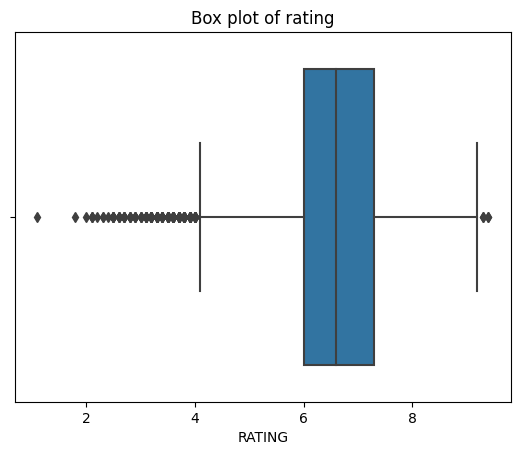

In [43]:
sns.boxplot(data=df,x="RATING")
plt.xlabel=('RATING')
plt.title('Box plot of rating')

Text(0.5, 1.0, 'box plot of runtime')

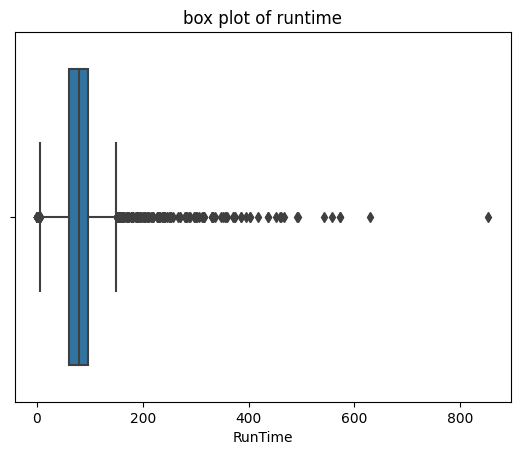

In [44]:
sns.boxplot(data=df,x='RunTime')
plt.xlabel=("RunTime")
plt.title("box plot of runtime")

Text(0.5, 1.0, 'boxplot of votes')

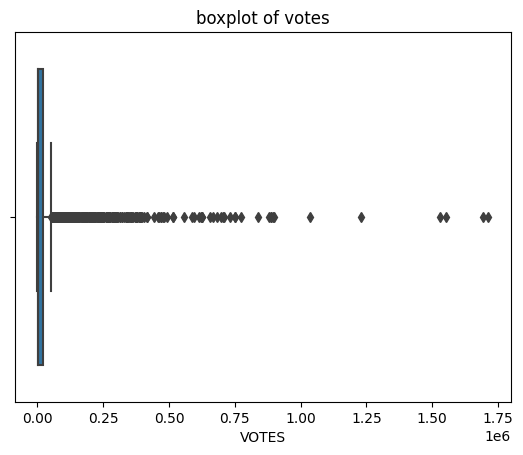

In [45]:
sns.boxplot(data=df,x="VOTES")
plt.xlabel=('VOTES')
plt.title('boxplot of votes')

Text(0.5, 1.0, 'top 10 highest rated movies')

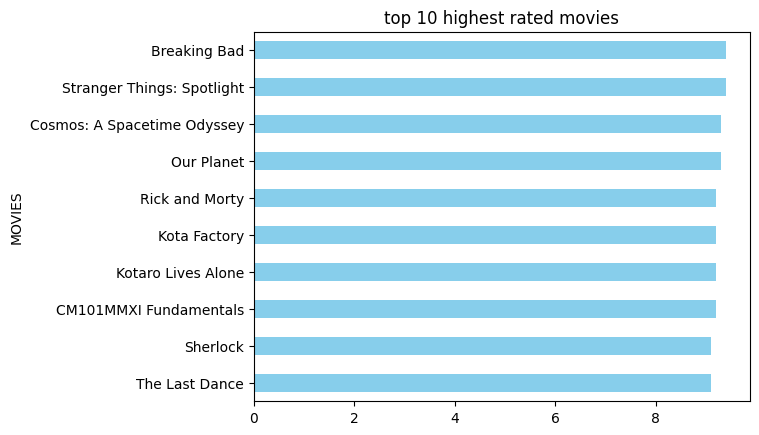

In [46]:
top10=df.nlargest(10,'RATING')[['MOVIES','RATING']]
top10.plot(kind='barh',x='MOVIES',y='RATING',color='skyblue',legend=False)
plt.gca().invert_yaxis()
plt.xlabel=('MOVIES')
plt.title("top 10 highest rated movies")

Text(0.5, 1.0, 'top 10 lowest rated movies')

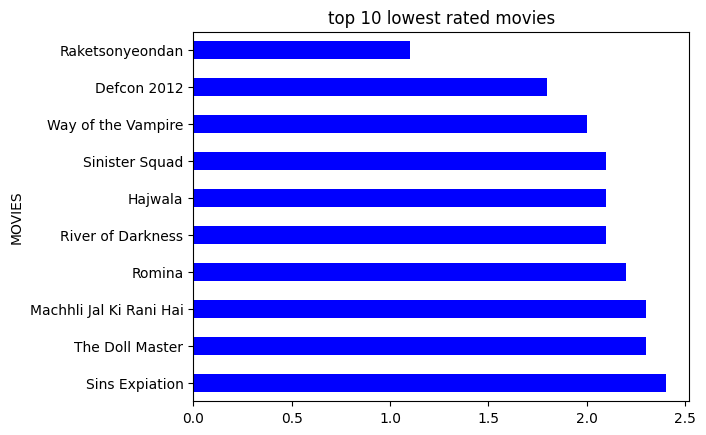

In [47]:
top_10=df.nsmallest(10,"RATING")[['MOVIES','RATING']]
top_10.plot(kind='barh',x='MOVIES',y='RATING',color='b',legend=False)
plt.gca().invert_yaxis()
plt.xlabel=("MOVIES")
plt.title("top 10 lowest rated movies")

Text(0.5, 1.0, 'Top 10 movies with highest runtime')

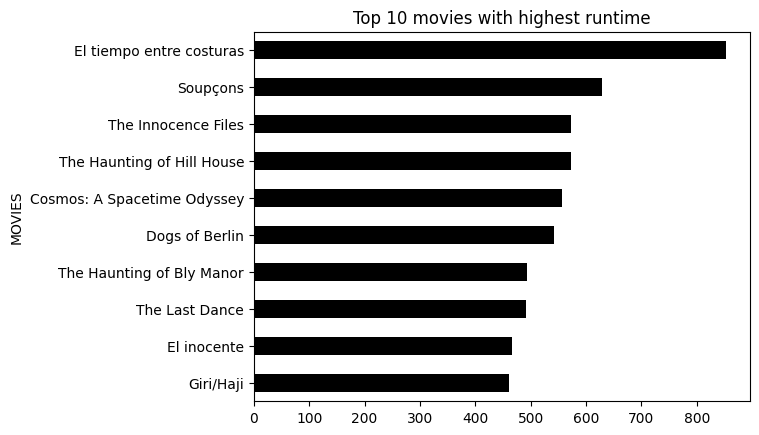

In [48]:
top__10=df.nlargest(10,"RunTime")[['MOVIES','RunTime']]
top__10.plot(kind='barh',x="MOVIES",y='RunTime',color='k',legend=False)
plt.gca().invert_yaxis()
plt.xlabel=('RunTime')
plt.title('Top 10 movies with highest runtime')

In [49]:
zscore_rating=np.abs(stats.zscore(df['RATING']))
threshold=3
outliers_rating=df[zscore_rating>threshold]
df_cleaned=df[zscore_rating<=threshold]
num_outliers_rating=len(df)-len(df_cleaned)
print("number of outliers removed from rating column:",num_outliers_rating)

number of outliers removed from rating column: 59


In [50]:
zscore_votes=np.abs(stats.zscore(df["VOTES"]))
threshold=3
outliers_votes=df[zscore_votes>threshold]
df_cleaned_votes=df[zscore_votes<=threshold]
num_outliers_votes=len(df)-len(df_cleaned_votes)
print("num of outliers removed from votes column:",num_outliers_votes)

num of outliers removed from votes column: 107


In [51]:
df.shape

(6398, 7)

In [52]:
df.isnull().sum()

MOVIES     0
YEAR       0
GENRE      0
RATING     0
STARS      0
VOTES      0
RunTime    0
dtype: int64

In [53]:
df.dtypes

MOVIES      object
YEAR        object
GENRE       object
RATING     float64
STARS       object
VOTES      float64
RunTime    float64
dtype: object

In [54]:
df.head()

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.100000,Director: Peter Thorwarth | Stars: Peri B...,21062.000000,121.000000
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.000000,"Stars: Chris Wood, Sarah Michelle Gellar, Le...",17870.000000,25.000000
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.200000,"Stars: Andrew Lincoln, Norman Reedus, Meliss...",885805.000000,44.000000
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.200000,"Stars: Justin Roiland, Chris Parnell, Spence...",414849.000000,23.000000
4,Army of Thieves,(2021),"Action, Crime, Horror",6.595237,Director: Matthias Schweighöfer | Stars: ...,21652.736861,79.832805


In [55]:
df.tail()

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime
9845,Disparu à jamais,(2021),"Crime, Drama, Mystery",6.595237,Director: Juan Carlos Medina | Star: Boje...,21652.736861,79.832805
9901,Modern Family,(2009–2020),"Comedy, Drama, Romance",8.200000,Director: Jason Winer | Stars: Ed O'Neill...,3404.000000,23.000000
9993,Totenfrau,(2022– ),"Drama, Thriller",6.595237,Director: Nicolai Rohde | Stars: Felix Kl...,21652.736861,79.832805
9995,Arcane,(2021– ),"Animation, Action, Adventure",6.595237,,21652.736861,79.832805
9996,Heart of Invictus,(2022– ),"Documentary, Sport",6.595237,Director: Orlando von Einsiedel | Star: P...,21652.736861,79.832805


In [56]:
df.reset_index(drop=True)

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.100000,Director: Peter Thorwarth | Stars: Peri B...,21062.000000,121.000000
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.000000,"Stars: Chris Wood, Sarah Michelle Gellar, Le...",17870.000000,25.000000
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.200000,"Stars: Andrew Lincoln, Norman Reedus, Meliss...",885805.000000,44.000000
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.200000,"Stars: Justin Roiland, Chris Parnell, Spence...",414849.000000,23.000000
4,Army of Thieves,(2021),"Action, Crime, Horror",6.595237,Director: Matthias Schweighöfer | Stars: ...,21652.736861,79.832805
...,...,...,...,...,...,...,...
6393,Disparu à jamais,(2021),"Crime, Drama, Mystery",6.595237,Director: Juan Carlos Medina | Star: Boje...,21652.736861,79.832805
6394,Modern Family,(2009–2020),"Comedy, Drama, Romance",8.200000,Director: Jason Winer | Stars: Ed O'Neill...,3404.000000,23.000000
6395,Totenfrau,(2022– ),"Drama, Thriller",6.595237,Director: Nicolai Rohde | Stars: Felix Kl...,21652.736861,79.832805
6396,Arcane,(2021– ),"Animation, Action, Adventure",6.595237,,21652.736861,79.832805


In [57]:
df.to_csv('cleaned_movies.csv')